In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from IPython import display
from tensorflow.keras import models
import time

# Balanced

### Data contains 1200 images (600 normal, 600 pneumonia). 800 will be used for train, 200 for validation, 200 for test

In [3]:
train_dir = r'D:\Diss\Balanced\train'
test_dir = r'D:\Diss\Balanced\test'
validation_dir = r'D:\Diss\Validation'

In [4]:
def prep_fn(img):
    img = img.astype(np.float32) / 127.5
    img = (img - 1)
    return img

train_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
test_datagen = ImageDataGenerator(preprocessing_function=prep_fn)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=27,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(128,128),
                                                       batch_size=12,
                                                       class_mode="binary")




Found 2376 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
def showImage(image):
    image = image*255
    image = np.array(image, dtype=np.uint8)
    print(image)
    if np.ndim(image)>3:
        image = image[0]
    image = PIL.Image.fromarray(image)
    t.show()

# VGG

### Check if model has been made

In [6]:
vgg = tf.keras.models.load_model(r'D:\Diss\Weights\VGG\Balanced\vgg')

### Make if not

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

In [9]:
model = tf.keras.applications.VGG19(input_shape = (128,128,3),include_top=False,weights=None)
vgg = tf.keras.models.Sequential()
vgg.add(model)
vgg.add(layers.Flatten())
vgg.add(layers.Dense(512,activation="relu"))
vgg.add(layers.Dense(1,activation="sigmoid"))
vgg.summary()

vgg.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 24,219,713
Trainable params: 24,219,713
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
88/88 [==============================] - 30s 271ms/step - loss: 0.6481 - binary_accuracy: 0.6686 - val_loss: 0.3387 - val_binary_accuracy: 0.8833
Epoch 2/30
88/88 [==============================] - 19s 217ms/step - loss: 0.2429 - binary_accuracy: 0.8996 - val_loss: 0.2834 - val_binary_accuracy: 0.8667
Epoch 3/30
88/88 [==============================] - 16s 181ms/step - loss: 0.1708 - binary_accuracy: 0.9337 - val_loss: 0.1676 - val_binary_accuracy: 0.9333
Epoch 4/30
88/88 [==============================] - 15s 169ms/step - loss: 0.1429 - binary_accuracy: 0.9451 - val_loss: 0.6038 - val_binary_accuracy: 0.8417
Epoch 5/30
88/88 [==============================] - 15s 171ms/step - loss: 0.1409 - binary_accuracy: 0.9460 - val_loss: 0.1699 - val_binary_accuracy: 0.9333
Epoch 6/30
88/88 [==============================] - 15s 174ms/step - loss: 0.1284 - binary_accuracy: 0.9631 - val_loss: 0.2135 - val_binary_accuracy: 0.9167
Epoch 7/30
88/88 [==============================] - 14s 16

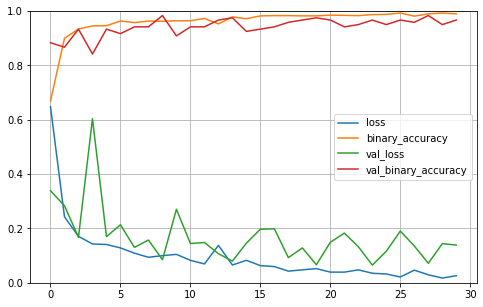

In [11]:
history = vgg.fit(train_generator,
                   steps_per_epoch=88,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                 class_mode="binary")

def evaluate(model):
    test_loss, test_acc = model.evaluate(test_generator)
    train_loss, train_acc = model.evaluate(train_generator)
    
    print("Test loss: {0}, Test acc: {1} \nTrain loss: {2}, Train acc: {3}".format(test_loss,test_acc,
                                                                                   train_loss, train_acc))

Found 200 images belonging to 2 classes.


In [35]:
evaluate(vgg)

88/88 [==============================] - 74s 826ms/step - loss: 0.0185 - binary_accuracy: 0.9937
Test loss: 0.1715744137763977, Test acc: 0.9350000023841858 
Train loss: 0.018530944362282753, Train acc: 0.993686854839325


In [14]:
vgg.save(r'D:\Diss\Weights\VGG\Balanced\vgg')

INFO:tensorflow:Assets written to: D:\Diss\Weights\VGG\Balanced\vgg\assets


# RES

### Check for model

In [6]:
res = tf.keras.models.load_model(r'D:\Diss\Weights\RES\Balanced\res')

In [15]:
res_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=False)

In [16]:
model = tf.keras.applications.ResNet50V2(input_shape = (128,128,3),include_top=False,weights=None)
res = tf.keras.models.Sequential()
res.add(model)
res.add(layers.Flatten())
res.add(layers.Dense(512,activation="relu"))
res.add(layers.Dense(1,activation="sigmoid"))
res.summary()

res.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 40,343,041
Trainable params: 40,297,601
Non-trainable params: 45,440
_________________________________________________________________


Epoch 1/30
88/88 [==============================] - 19s 153ms/step - loss: 0.3907 - binary_accuracy: 0.8277 - val_loss: 1.4270 - val_binary_accuracy: 0.5000
Epoch 2/30
88/88 [==============================] - 13s 151ms/step - loss: 0.2267 - binary_accuracy: 0.9157 - val_loss: 2.7052 - val_binary_accuracy: 0.5000
Epoch 3/30
88/88 [==============================] - 13s 151ms/step - loss: 0.1539 - binary_accuracy: 0.9337 - val_loss: 3.1156 - val_binary_accuracy: 0.5000
Epoch 4/30
88/88 [==============================] - 14s 153ms/step - loss: 0.1319 - binary_accuracy: 0.9498 - val_loss: 3.3424 - val_binary_accuracy: 0.5000
Epoch 5/30
88/88 [==============================] - 13s 152ms/step - loss: 0.0995 - binary_accuracy: 0.9593 - val_loss: 1.2051 - val_binary_accuracy: 0.5333
Epoch 6/30
88/88 [==============================] - 13s 149ms/step - loss: 0.0861 - binary_accuracy: 0.9678 - val_loss: 0.6597 - val_binary_accuracy: 0.6917
Epoch 7/30
88/88 [==============================] - 13s 15

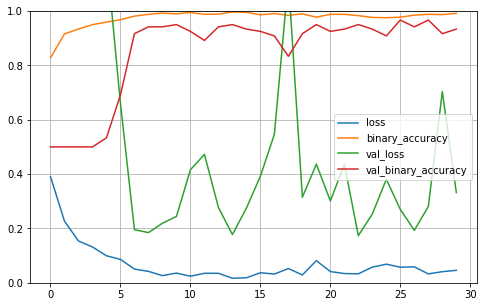

In [17]:
historyres = res.fit(train_generator,
                   steps_per_epoch=88,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[res_early_stop])

pd.DataFrame(historyres.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
evaluate(res)

198/198 [==============================] - 26s 125ms/step - loss: 0.0655 - binary_accuracy: 0.9886
Test loss: 0.235053151845932, Test acc: 0.9350000023841858 
Train loss: 0.06553138047456741, Train acc: 0.9886363744735718


In [20]:
res.save(r'D:\Diss\Weights\RES\Balanced\res')

INFO:tensorflow:Assets written to: D:\Diss\Weights\RES\Balanced\res\assets


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# INC

In [7]:
Inc = tf.keras.models.load_model(r'D:\Diss\Weights\INC\Balanced\inc')

In [21]:
model = tf.keras.applications.InceptionV3(input_shape = (128,128,3),include_top=False,weights=None)
Inc = tf.keras.models.Sequential()
Inc.add(model)
Inc.add(layers.Flatten())
Inc.add(layers.Dense(512,activation="relu"))
Inc.add(layers.Dense(1,activation="sigmoid"))
Inc.summary()

Inc.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 25,998,113
Trainable params: 25,963,681
Non-trainable params: 34,432
_________________________________________________________________


Epoch 1/30
88/88 [==============================] - 24s 185ms/step - loss: 0.5213 - binary_accuracy: 0.7689 - val_loss: 0.6969 - val_binary_accuracy: 0.5000
Epoch 2/30
88/88 [==============================] - 14s 163ms/step - loss: 0.3599 - binary_accuracy: 0.8513 - val_loss: 0.7186 - val_binary_accuracy: 0.5000
Epoch 3/30
88/88 [==============================] - 14s 155ms/step - loss: 0.2971 - binary_accuracy: 0.8835 - val_loss: 1.3914 - val_binary_accuracy: 0.5000
Epoch 4/30
88/88 [==============================] - 14s 157ms/step - loss: 0.3119 - binary_accuracy: 0.8864 - val_loss: 1.7972 - val_binary_accuracy: 0.5000
Epoch 5/30
88/88 [==============================] - 14s 154ms/step - loss: 0.2870 - binary_accuracy: 0.8845 - val_loss: 1.2320 - val_binary_accuracy: 0.5417
Epoch 6/30
88/88 [==============================] - 14s 160ms/step - loss: 0.2836 - binary_accuracy: 0.8864 - val_loss: 0.5210 - val_binary_accuracy: 0.7500
Epoch 7/30
88/88 [==============================] - 14s 15

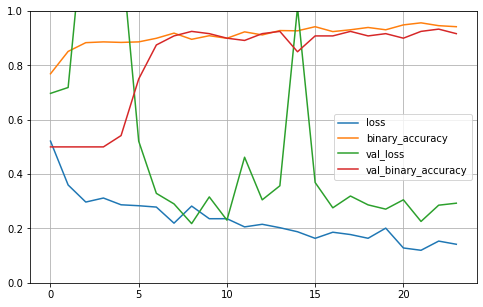

In [22]:
historyInc = Inc.fit(train_generator,
                   steps_per_epoch=88,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyInc.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [23]:
evaluate(Inc)

198/198 [==============================] - 27s 132ms/step - loss: 0.1698 - binary_accuracy: 0.9377
Test loss: 0.3111458122730255, Test acc: 0.8550000190734863 
Train loss: 0.16978581249713898, Train acc: 0.9377104640007019


In [24]:
Inc.save(r'D:\Diss\Weights\INC\Balanced\inc')

INFO:tensorflow:Assets written to: D:\Diss\Weights\INC\Balanced\inc\assets


# Custom

In [5]:
customB = tf.keras.models.Sequential()
customB.add(layers.Conv2D(64, (5,5), padding="same", input_shape=[128,128,3]))
customB.add(layers.LeakyReLU(alpha=0.2))
customB.add(layers.Conv2D(128, (5,5), strides=(2,2), padding="same"))
customB.add(layers.LeakyReLU(alpha=0.2))
customB.add(layers.Conv2D(256, (5,5), strides=(2,2), padding="same"))
customB.add(layers.LeakyReLU(alpha=0.2))
customB.add(layers.Conv2D(512, (5,5), strides=(2,2), padding="same"))
customB.add(layers.LeakyReLU(alpha=0.2))
customB.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customB.add(layers.LeakyReLU(alpha=0.2))
customB.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customB.add(layers.LeakyReLU(alpha=0.2))
customB.add(layers.Flatten())
customB.add(layers.Dense(1,activation="sigmoid"))

In [6]:
customB.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 512)       3

In [8]:
customB = tf.keras.models.load_model(r'D:\Diss\Weights\CUSTOM\Balanced\custom')

In [7]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

customB.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Epoch 1/50
88/88 [==============================] - 84s 864ms/step - loss: 0.3019 - binary_accuracy: 0.8805 - val_loss: 0.2667 - val_binary_accuracy: 0.9083
Epoch 2/50
88/88 [==============================] - 27s 305ms/step - loss: 0.1343 - binary_accuracy: 0.9499 - val_loss: 0.1506 - val_binary_accuracy: 0.9417
Epoch 3/50
88/88 [==============================] - 27s 305ms/step - loss: 0.1112 - binary_accuracy: 0.9579 - val_loss: 0.1868 - val_binary_accuracy: 0.9167
Epoch 4/50
88/88 [==============================] - 27s 302ms/step - loss: 0.0862 - binary_accuracy: 0.9663 - val_loss: 0.1262 - val_binary_accuracy: 0.9333
Epoch 5/50
88/88 [==============================] - 27s 303ms/step - loss: 0.0821 - binary_accuracy: 0.9726 - val_loss: 0.0988 - val_binary_accuracy: 0.9667
Epoch 6/50
88/88 [==============================] - 27s 299ms/step - loss: 0.0739 - binary_accuracy: 0.9764 - val_loss: 0.1177 - val_binary_accuracy: 0.9500
Epoch 7/50
88/88 [==============================] - 26s 29

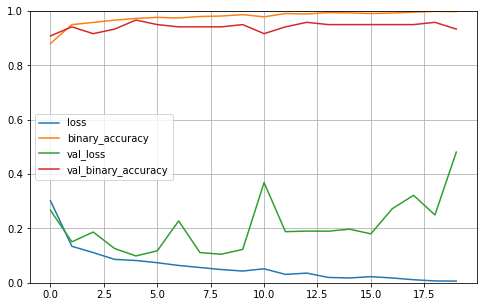

In [8]:
historyCustom = customB.fit(train_generator,
                   steps_per_epoch=88,
                   epochs=50,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyCustom.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [9]:
customB.save(r'D:\Diss\Weights\CUSTOM\Balanced\custom')

INFO:tensorflow:Assets written to: D:\Diss\Weights\CUSTOM\Balanced\custom\assets


In [12]:
evaluate(customB)

88/88 [==============================] - 24s 268ms/step - loss: 0.0665 - binary_accuracy: 0.9811
Test loss: 0.1625009924173355, Test acc: 0.9350000023841858 
Train loss: 0.06648572534322739, Train acc: 0.9810606241226196


# Precision / Recall / F1

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [13]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                  shuffle=False,
                                                 class_mode="binary")

Found 200 images belonging to 2 classes.


In [14]:
y_true = test_generator.labels

In [40]:
vgg_pred = vgg.predict_generator(test_generator)
vgg_pred = np.round(vgg_pred).flatten()

res_pred = res.predict_generator(test_generator)
res_pred = np.round(res_pred).flatten()

Inc_pred = Inc.predict_generator(test_generator)
Inc_pred = np.round(Inc_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [15]:
customB_pred = customB.predict_generator(test_generator)
customB_pred = np.round(customB_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [41]:
print("Precision VGG: {}".format(precision_score(y_true, vgg_pred)))
print("Recall VGG: {}".format(recall_score(y_true, vgg_pred)))
print("F1 VGG: {}".format(f1_score(y_true, vgg_pred)))

Precision VGG: 0.9578947368421052
Recall VGG: 0.91
F1 VGG: 0.9333333333333333


In [42]:
print("Precision RES: {}".format(precision_score(y_true, res_pred)))
print("Recall RES: {}".format(recall_score(y_true, res_pred)))
print("F1 RES: {}".format(f1_score(y_true, res_pred)))

Precision RES: 0.9065420560747663
Recall RES: 0.97
F1 RES: 0.9371980676328503


In [49]:
print("Precision INC: {}".format(precision_score(y_true, Inc_pred)))
print("Recall INC: {}".format(recall_score(y_true, Inc_pred)))
print("F1 INC: {}".format(f1_score(y_true, Inc_pred)))

Precision INC: 0.8585858585858586
Recall INC: 0.85
F1 INC: 0.8542713567839195


In [18]:
print("Precision CUSTOM: {}".format(precision_score(y_true, customB_pred)))
print("Recall CUSTOM: {}".format(recall_score(y_true, customB_pred)))
print("F1 CUSTOM: {}".format(f1_score(y_true, customB_pred)))

Precision CUSTOM: 0.9484536082474226
Recall CUSTOM: 0.92
F1 CUSTOM: 0.9340101522842639


# Imbalanced

### 600 Images consisting of 200 normal and 400 pneumonia

In [19]:
imbalanced_dir = r'D:\Diss\Full\train'
train_imbalanced_datagen = ImageDataGenerator(rescale=1./255)

train_imbalanced_generator = train_imbalanced_datagen.flow_from_directory(imbalanced_dir,
                                                   target_size=(128,128),
                                                   batch_size=12,
                                                   class_mode="binary")

Found 4812 images belonging to 2 classes.


# VGG

In [53]:
vgg_im = tf.keras.models.load_model(r"D:\Diss\Weights\VGG\Imbalanced\vgg_im")

In [27]:
model = tf.keras.applications.VGG19(input_shape = (128,128,3),include_top=False,weights=None)
vgg_im = tf.keras.models.Sequential()
vgg_im.add(model)
vgg_im.add(layers.Flatten())
vgg_im.add(layers.Dense(512,activation="relu"))
vgg_im.add(layers.Dense(1,activation="sigmoid"))

vgg_im.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Epoch 1/30
401/401 [==============================] - 42s 105ms/step - loss: 3.3931e-05 - binary_accuracy: 1.0000 - val_loss: 4.1577 - val_binary_accuracy: 0.6500
Epoch 2/30
401/401 [==============================] - 43s 107ms/step - loss: 1.4163e-05 - binary_accuracy: 1.0000 - val_loss: 4.1492 - val_binary_accuracy: 0.6500
Epoch 3/30
401/401 [==============================] - 42s 105ms/step - loss: 9.4070e-06 - binary_accuracy: 1.0000 - val_loss: 4.1762 - val_binary_accuracy: 0.6500
Epoch 4/30
401/401 [==============================] - 41s 103ms/step - loss: 6.6974e-06 - binary_accuracy: 1.0000 - val_loss: 4.1898 - val_binary_accuracy: 0.6583
Epoch 5/30
401/401 [==============================] - 41s 103ms/step - loss: 4.9313e-06 - binary_accuracy: 1.0000 - val_loss: 4.2457 - val_binary_accuracy: 0.6583
Epoch 6/30
401/401 [==============================] - 43s 107ms/step - loss: 3.6992e-06 - binary_accuracy: 1.0000 - val_loss: 4.2881 - val_binary_accuracy: 0.6583
Epoch 7/30
401/401 [==

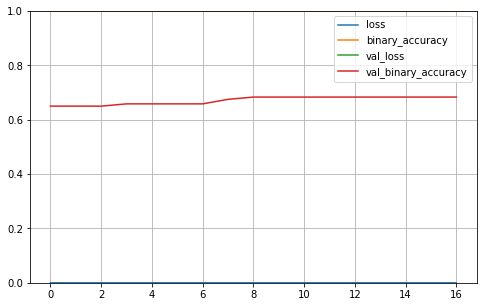

In [30]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
history = vgg_im.fit(train_imbalanced_generator,
                   steps_per_epoch=401,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
evaluate(vgg_im)

198/198 [==============================] - 26s 130ms/step - loss: 5.0224 - binary_accuracy: 0.5930
Test loss: 5.950611591339111, Test acc: 0.5849999785423279 
Train loss: 5.022429466247559, Train acc: 0.5930134654045105


In [32]:
vgg_im.save(r'D:\Diss\Weights\VGG\Imbalanced\vgg_im')

INFO:tensorflow:Assets written to: D:\Diss\Weights\VGG\Imbalanced\vgg_im\assets


# RES

In [54]:
res_im = tf.keras.models.load_model(r'D:\Diss\Weights\RES\Imbalanced\res_im')

In [33]:
model = tf.keras.applications.ResNet50V2(input_shape = (128,128,3),include_top=False,weights=None)
res_im = tf.keras.models.Sequential()
res_im.add(model)
res_im.add(layers.Flatten())
res_im.add(layers.Dense(512,activation="relu"))
res_im.add(layers.Dense(1,activation="sigmoid"))
res_im.summary()

res_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=False)

res_im.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 40,343,041
Trainable params: 40,297,601
Non-trainable params: 45,440
_________________________________________________________________


Epoch 1/30
401/401 [==============================] - 53s 113ms/step - loss: 0.2655 - binary_accuracy: 0.8886 - val_loss: 0.9013 - val_binary_accuracy: 0.7333
Epoch 2/30
401/401 [==============================] - 46s 114ms/step - loss: 0.1331 - binary_accuracy: 0.9493 - val_loss: 15.3146 - val_binary_accuracy: 0.5000
Epoch 3/30
401/401 [==============================] - 44s 109ms/step - loss: 0.0849 - binary_accuracy: 0.9688 - val_loss: 14.6375 - val_binary_accuracy: 0.5083
Epoch 4/30
401/401 [==============================] - 45s 111ms/step - loss: 0.0566 - binary_accuracy: 0.9792 - val_loss: 5.0637 - val_binary_accuracy: 0.6333
Epoch 5/30
401/401 [==============================] - 43s 108ms/step - loss: 0.0785 - binary_accuracy: 0.9719 - val_loss: 6.5847 - val_binary_accuracy: 0.7083
Epoch 6/30
401/401 [==============================] - 46s 113ms/step - loss: 0.0551 - binary_accuracy: 0.9819 - val_loss: 29.6587 - val_binary_accuracy: 0.5000
Epoch 7/30
401/401 [=======================

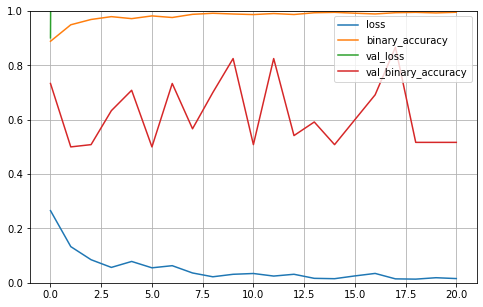

In [34]:
historyres = res_im.fit(train_imbalanced_generator,
                   steps_per_epoch=401,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[res_early_stop])

pd.DataFrame(historyres.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
evaluate(res_im)

198/198 [==============================] - 27s 132ms/step - loss: 19.3481 - binary_accuracy: 0.5034
Test loss: 21.923297882080078, Test acc: 0.5 
Train loss: 19.348134994506836, Train acc: 0.503367006778717


In [36]:
res_im.save(r'D:\Diss\Weights\RES\Imbalanced\res_im')

INFO:tensorflow:Assets written to: D:\Diss\Weights\RES\Imbalanced\res_im\assets


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# INC

In [55]:
Inc_im = tf.keras.models.load_model(r'D:\Diss\Weights\INC\Imbalanced\inc_im')

In [37]:
model = tf.keras.applications.InceptionV3(input_shape = (128,128,3),include_top=False,weights=None)
Inc_im = tf.keras.models.Sequential()
Inc_im.add(model)
Inc_im.add(layers.Flatten())
Inc_im.add(layers.Dense(512,activation="relu"))
Inc_im.add(layers.Dense(1,activation="sigmoid"))
Inc_im.summary()

Inc_im.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 25,998,113
Trainable params: 25,963,681
Non-trainable params: 34,432
_________________________________________________________________


Epoch 1/30
401/401 [==============================] - 52s 115ms/step - loss: 0.3443 - binary_accuracy: 0.8491 - val_loss: 7.7124 - val_binary_accuracy: 0.5000
Epoch 2/30
401/401 [==============================] - 44s 110ms/step - loss: 0.2485 - binary_accuracy: 0.8998 - val_loss: 5.4390 - val_binary_accuracy: 0.6333
Epoch 3/30
401/401 [==============================] - 44s 109ms/step - loss: 0.2161 - binary_accuracy: 0.9133 - val_loss: 13.7777 - val_binary_accuracy: 0.5083
Epoch 4/30
401/401 [==============================] - 43s 107ms/step - loss: 0.1997 - binary_accuracy: 0.9187 - val_loss: 10.3572 - val_binary_accuracy: 0.5167
Epoch 5/30
401/401 [==============================] - 44s 110ms/step - loss: 0.1713 - binary_accuracy: 0.9350 - val_loss: 38.0832 - val_binary_accuracy: 0.5000
Epoch 6/30
401/401 [==============================] - 43s 106ms/step - loss: 0.1537 - binary_accuracy: 0.9362 - val_loss: 25.5483 - val_binary_accuracy: 0.5000
Epoch 7/30
401/401 [======================

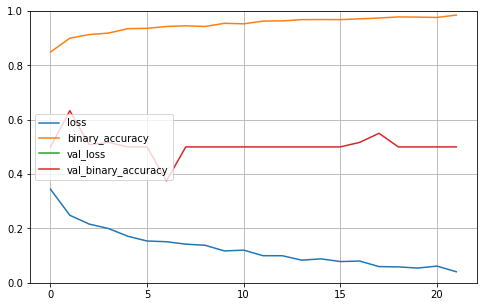

In [38]:
historyInc = Inc_im.fit(train_imbalanced_generator,
                   steps_per_epoch=401,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[res_early_stop])

pd.DataFrame(historyInc.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [39]:
evaluate(Inc_im)

198/198 [==============================] - 27s 135ms/step - loss: 92.7304 - binary_accuracy: 0.5000
Test loss: 97.4515609741211, Test acc: 0.5 
Train loss: 92.73043060302734, Train acc: 0.5


In [40]:
Inc_im.save(r'D:\Diss\Weights\INC\Imbalanced\inc_im')

INFO:tensorflow:Assets written to: D:\Diss\Weights\INC\Imbalanced\inc_im\assets


# CUSTOM

In [56]:
customI = tf.keras.models.load_model(r'D:\Diss\Weights\CUSTOM\Imbalanced\custom')

In [20]:
customI = tf.keras.models.Sequential()
customI.add(layers.Conv2D(64, (5,5), padding="same", input_shape=[128,128,3]))
customI.add(layers.LeakyReLU(alpha=0.2))
customI.add(layers.Conv2D(128, (5,5), strides=(2,2), padding="same"))
customI.add(layers.LeakyReLU(alpha=0.2))
customI.add(layers.Conv2D(256, (5,5), strides=(2,2), padding="same"))
customI.add(layers.LeakyReLU(alpha=0.2))
customI.add(layers.Conv2D(512, (5,5), strides=(2,2), padding="same"))
customI.add(layers.LeakyReLU(alpha=0.2))
customI.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customI.add(layers.LeakyReLU(alpha=0.2))
customI.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customI.add(layers.LeakyReLU(alpha=0.2))
customI.add(layers.Flatten())
customI.add(layers.Dense(1,activation="sigmoid"))

In [21]:
customI.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 512)      

In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

customI.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Epoch 1/30
401/401 [==============================] - 145s 359ms/step - loss: 0.2365 - binary_accuracy: 0.9000 - val_loss: 0.4929 - val_binary_accuracy: 0.7667
Epoch 2/30
401/401 [==============================] - 43s 108ms/step - loss: 0.1245 - binary_accuracy: 0.9516 - val_loss: 0.1632 - val_binary_accuracy: 0.9167
Epoch 3/30
401/401 [==============================] - 45s 112ms/step - loss: 0.1097 - binary_accuracy: 0.9618 - val_loss: 0.4044 - val_binary_accuracy: 0.8000
Epoch 4/30
401/401 [==============================] - 46s 114ms/step - loss: 0.0994 - binary_accuracy: 0.9616 - val_loss: 0.2928 - val_binary_accuracy: 0.8750
Epoch 5/30
401/401 [==============================] - 43s 108ms/step - loss: 0.0882 - binary_accuracy: 0.9657 - val_loss: 0.3420 - val_binary_accuracy: 0.8500
Epoch 6/30
401/401 [==============================] - 43s 108ms/step - loss: 0.0759 - binary_accuracy: 0.9736 - val_loss: 0.1652 - val_binary_accuracy: 0.9500
Epoch 7/30
401/401 [=========================

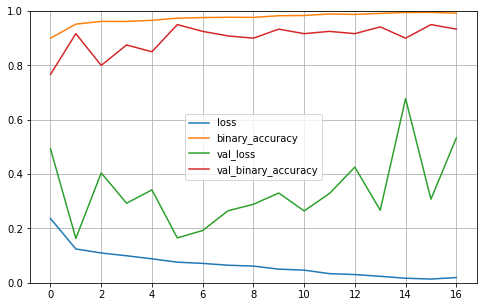

In [23]:
historyCustomI = customI.fit(train_imbalanced_generator,
                   steps_per_epoch=401,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyCustomI.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [24]:
customI.save(r'D:\Diss\Weights\CUSTOM\Imbalanced\custom')

INFO:tensorflow:Assets written to: D:\Diss\Weights\CUSTOM\Imbalanced\custom\assets


In [25]:
evaluate(customI)

88/88 [==============================] - 48s 537ms/step - loss: 0.1704 - binary_accuracy: 0.9272
Test loss: 0.3100028932094574, Test acc: 0.8600000143051147 
Train loss: 0.17037279903888702, Train acc: 0.9271885752677917


# Precision / Recall / F1

In [57]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [26]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                  shuffle=False,
                                                 class_mode="binary")

Found 200 images belonging to 2 classes.


In [27]:
y_true = test_generator.labels

In [60]:
vgg_im_pred = vgg_im.predict_generator(test_generator)
vgg_im_pred = np.round(vgg_im_pred).flatten()

res_im_pred = res_im.predict_generator(test_generator)
res_im_pred = np.round(res_im_pred).flatten()

Inc_im_pred = Inc_im.predict_generator(test_generator)
Inc_im_pred = np.round(Inc_im_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [28]:
customI_pred = customI.predict_generator(test_generator)
customI_pred = np.round(customI_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [64]:
print("Precision VGG: {}".format(precision_score(y_true, vgg_im_pred)))
print("Recall VGG: {}".format(recall_score(y_true, vgg_im_pred)))
print("F1 VGG: {}".format(f1_score(y_true, vgg_im_pred)))

Precision VGG: 0.5469613259668509
Recall VGG: 0.99
F1 VGG: 0.7046263345195729


In [65]:
print("Precision RES: {}".format(precision_score(y_true, res_im_pred)))
print("Recall RES: {}".format(recall_score(y_true, res_im_pred)))
print("F1 RES: {}".format(f1_score(y_true, res_im_pred)))

Precision RES: 0.5
Recall RES: 1.0
F1 RES: 0.6666666666666666


In [66]:
print("Precision INC: {}".format(precision_score(y_true, Inc_im_pred)))
print("Recall INC: {}".format(recall_score(y_true, Inc_im_pred)))
print("F1 INC: {}".format(f1_score(y_true, Inc_im_pred)))

Precision INC: 0.5
Recall INC: 1.0
F1 INC: 0.6666666666666666


In [29]:
print("Precision CUSTOM: {}".format(precision_score(y_true, customI_pred)))
print("Recall CUSTOM: {}".format(recall_score(y_true, customI_pred)))
print("F1 CUSTOM: {}".format(f1_score(y_true, customI_pred)))

Precision CUSTOM: 0.9736842105263158
Recall CUSTOM: 0.74
F1 CUSTOM: 0.8409090909090909


# Generator

In [8]:
def generator():
    model = models.Sequential()
    model.add(layers.Dense(8*8*1024, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Reshape((8,8,1024)))
    
    model.add(layers.Conv2DTranspose(512,(5,5),strides=(2,2),padding="same",
                                    use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(256,(5,5),strides=(2,2),padding="same",
                                    use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(128,(5,5),strides=(2,2),padding="same",
                                    use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding="same",
                                    use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(3,(5,5), padding="same", use_bias=False, activation="tanh"))

    return model

In [6]:
generator = generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65536)             6553600   
_________________________________________________________________
batch_normalization (BatchNo (None, 65536)             262144    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 65536)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 1024)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 512)       13107200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 512)       2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 512)       0

In [9]:
def discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5,5), padding="same", input_shape=[128,128,3]))
    
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Conv2D(256, (5,5), strides=(2,2), padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Conv2D(512, (5,5), strides=(2,2), padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    return model

In [8]:
discriminator = discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 512)      

In [9]:
EPOCHS = 200
noise_dim = 100
num_examples = 16

seed = tf.random.normal([num_examples, noise_dim])

In [10]:
d_optimizer = keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
g_optimizer = keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

In [11]:
def disc_loss(real, fake):
    real_loss = loss(tf.zeros_like(real), real)
    fake_loss = loss(tf.ones_like(fake), fake)
    total = real_loss + fake_loss
    return total

def gen_loss(fake):
    return loss(tf.zeros_like(fake),fake)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=g_optimizer,
                                 discriminator_optimizer=d_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [12]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=g_optimizer,
                                 discriminator_optimizer=d_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [13]:
train_dir = r'D:\Diss\Full\train'

train_norm_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=50,
                                                   classes=["Normal"])

Found 1189 images belonging to 1 classes.


In [14]:
@tf.function
def train_step(images):
    noise = tf.random.normal(shape=(50,100))
    
    with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
        
        fake_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(fake_images, training=True)
        
        d_loss = disc_loss(real_output,fake_output)
        g_loss = gen_loss(fake_output)
        
    disc_grads = d_tape.gradient(d_loss, discriminator.trainable_weights)
    d_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_weights))
    

    gen_grads = g_tape.gradient(g_loss, generator.trainable_weights)  
    g_optimizer.apply_gradients(zip(gen_grads, generator.trainable_weights))
    
    
    return g_loss, d_loss

In [15]:
tf.config.run_functions_eagerly(True)
def train(data, epochs, batches=20):
    
    for epoch in range(epochs):
        start = time.time()
        
        for i in range(19):
            images = data.next()
            g_loss, d_loss = train_step(images[0])
            

        display.clear_output(wait=True)
        generate_save_images(generator,epoch+1,seed)
        
        print("D_loss {}".format(d_loss))
        print("G_loss {}".format(g_loss))
        
        #if (epoch + 1) % 15 == 0:
            #checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_save_images(generator,
                       epochs,
                       seed)

In [16]:
#checkpoint.restore(tf.train.latest_checkpoint(r'./training_checkpoints'))
#furthest trained
checkpoint.restore(r'./training_checkpoints\\ckpt-18')

# best so far
#checkpoint.restore(r'./training_checkpoints\\ckpt-5')

In [17]:
def generate_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    
    fig = plt.figure(figsize=(4,4))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(predictions[i,:,:,0]*127.5+127.5, cmap="gray")
        plt.axis("off")
        
    plt.savefig("image.png")
    plt.show()

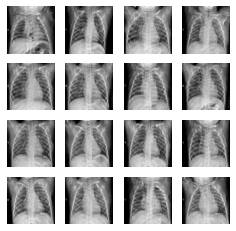

In [18]:
train(train_norm_generator, EPOCHS)

In [25]:
checkpoint.save(file_prefix = checkpoint_prefix)

'./training_checkpoints\\ckpt-18'

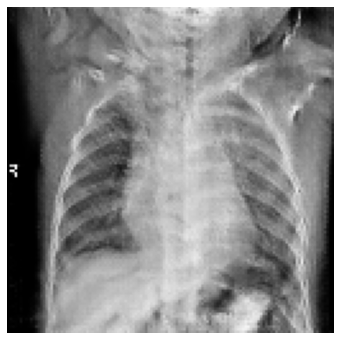

In [31]:
test = generator(tf.random.normal([num_examples, noise_dim]))
fig = plt.figure(figsize=(6,6))
plt.imshow(test[0,:,:,0]*127.5+127.5, cmap="gray")
plt.axis("off")
plt.show()

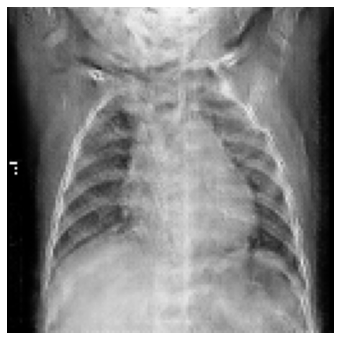

In [72]:
test = generator(tf.random.normal([num_examples, noise_dim]))
fig = plt.figure(figsize=(6,6))
plt.imshow(test[5,:,:,0]*127.5+127.5, cmap="gray")
plt.axis("off")
plt.show()

In [24]:
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

fid_norm_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=100,
                                                   classes=["Normal"])

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(128,128,3))
# load cifar10 images
#(images1, _) = fid_norm_generator.next()
#noise = tf.random.normal(shape=(100,100))
#(images2,_) = fid_norm_generator.next()
#images2 = generator(noise, training=False)
#shuffle(images1)
print('Loaded', t.shape, flat_list.shape)
# convert integer to floating point values
#images1 = images1.astype('float32')
#images2 = images2.astype('float32')

# calculate fid
fid = calculate_fid(model, t, flat_list)
print('FID: %.3f' % fid)

Found 1349 images belonging to 1 classes.
Loaded (1349, 128, 128, 3) (1349, 128, 128, 3)


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


FID: 1734.387


In [18]:
fid_norm_generator1 = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=1189,
                                                   classes=["Normal"])

t = fid_norm_generator1.next()[0]

Found 1189 images belonging to 1 classes.


In [56]:
m = []
result = []
for i in range(1217):
    noise = tf.random.normal(shape=(2,100))
    m.append(generator(noise, training=False))
flat_list = [item for sublist in m for item in sublist]
flat_list = np.asarray(flat_list)

In [62]:
print(len(flat_list))

2434


In [42]:
# Test against normal class (0=normal, 1=pneumonia)
def evaluateGAN(model):
    noise = tf.random.normal(shape=(71,100))
    loss, acc = model.evaluate(flat_list,y=np.asarray([0.]*1349))
    
    print("loss: {0}, acc: {1}".format(loss,acc))

In [43]:
evaluateGAN(vgg)

43/43 [==============================] - 3s 49ms/step - loss: 0.0469 - binary_accuracy: 0.9837
loss: 0.046872418373823166, acc: 0.9836916327476501


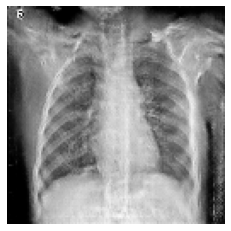

In [74]:
# Save images into folder
plt.imshow(flat_list[0,:,:,0]*127.5+127.5, cmap="gray")
plt.axis("off")
plt.show()
for i in range(len(flat_list)):
    plt.imsave(r'D:\Diss\Synthesised\train\Normal\synth{0}.jpeg'.format(i), flat_list[i,:,:,0]*127.5+127.5, cmap="gray")

# Balanced Synth

In [52]:
train_dir = r'D:\Diss\Synthesised\train'
test_dir = r'D:\Diss\Synthesised\test'
validation_dir = r'D:\Diss\Validation'

In [31]:
def prep_fn(img):
    img = img.astype(np.float32) / 127.5
    img = (img - 1)
    return img

train_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
test_datagen = ImageDataGenerator(preprocessing_function=prep_fn)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=30,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(128,128),
                                                       batch_size=12,
                                                       class_mode="binary")

Found 7246 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# VGG

In [79]:
vgg = tf.keras.models.load_model(r'D:\Diss\Weights\VGG\Synthetic\vgg')

In [80]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

model = tf.keras.applications.VGG19(input_shape = (128,128,3),include_top=False,weights=None)
vgg = tf.keras.models.Sequential()
vgg.add(model)
vgg.add(layers.Flatten())
vgg.add(layers.Dense(512,activation="relu"))
vgg.add(layers.Dense(1,activation="sigmoid"))
vgg.summary()

vgg.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 24,219,713
Trainable params: 24,219,713
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
241/241 [==============================] - 57s 225ms/step - loss: 0.2933 - binary_accuracy: 0.8717 - val_loss: 0.1457 - val_binary_accuracy: 0.9500
Epoch 2/30
241/241 [==============================] - 44s 183ms/step - loss: 0.0981 - binary_accuracy: 0.9658 - val_loss: 0.0956 - val_binary_accuracy: 0.9583
Epoch 3/30
241/241 [==============================] - 44s 182ms/step - loss: 0.0880 - binary_accuracy: 0.9684 - val_loss: 0.1581 - val_binary_accuracy: 0.9417
Epoch 4/30
241/241 [==============================] - 44s 181ms/step - loss: 0.0644 - binary_accuracy: 0.9775 - val_loss: 0.1291 - val_binary_accuracy: 0.9333
Epoch 5/30
241/241 [==============================] - 44s 181ms/step - loss: 0.0600 - binary_accuracy: 0.9794 - val_loss: 0.0566 - val_binary_accuracy: 0.9833
Epoch 6/30
241/241 [==============================] - 44s 181ms/step - loss: 0.0523 - binary_accuracy: 0.9820 - val_loss: 0.0477 - val_binary_accuracy: 0.9833
Epoch 7/30
241/241 [==========================

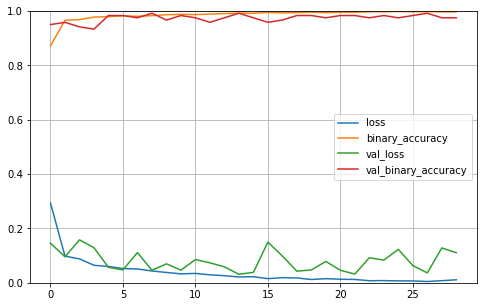

In [81]:
history = vgg.fit(train_generator,
                   steps_per_epoch=241,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [82]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                 class_mode="binary")

def evaluate(model):
    test_loss, test_acc = model.evaluate(test_generator)
    train_loss, train_acc = model.evaluate(train_generator)
    
    print("Test loss: {0}, Test acc: {1} \nTrain loss: {2}, Train acc: {3}".format(test_loss,test_acc,
                                                                                   train_loss, train_acc))

Found 300 images belonging to 2 classes.


In [83]:
evaluate(vgg)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


242/242 [==============================] - 41s 166ms/step - loss: 0.0199 - binary_accuracy: 0.9930
Test loss: 0.10212965309619904, Test acc: 0.9599999785423279 
Train loss: 0.019855888560414314, Train acc: 0.9929616451263428


In [84]:
vgg.save(r'D:\Diss\Weights\VGG\Synthetic\vgg')

INFO:tensorflow:Assets written to: D:\Diss\Weights\VGG\Synthetic\vgg\assets


# RES

In [80]:
res = tf.keras.models.load_model(r'D:\Diss\Weights\RES\Synthetic\res')

In [85]:
res_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=False)

In [86]:
model = tf.keras.applications.ResNet50V2(input_shape = (128,128,3),include_top=False,weights=None)
res = tf.keras.models.Sequential()
res.add(model)
res.add(layers.Flatten())
res.add(layers.Dense(512,activation="relu"))
res.add(layers.Dense(1,activation="sigmoid"))
res.summary()

res.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 40,343,041
Trainable params: 40,297,601
Non-trainable params: 45,440
_________________________________________________________________


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
241/241 [==============================] - 53s 216ms/step - loss: 0.1789 - binary_accuracy: 0.9274 - val_loss: 3.4144 - val_binary_accuracy: 0.5000
Epoch 2/30
241/241 [==============================] - 48s 200ms/step - loss: 0.0574 - binary_accuracy: 0.9777 - val_loss: 1.0735 - val_binary_accuracy: 0.6000
Epoch 3/30
241/241 [==============================] - 49s 202ms/step - loss: 0.0237 - binary_accuracy: 0.9942 - val_loss: 0.1379 - val_binary_accuracy: 0.9500
Epoch 4/30
241/241 [==============================] - 49s 202ms/step - loss: 0.0125 - binary_accuracy: 0.9960 - val_loss: 0.2214 - val_binary_accuracy: 0.9417
Epoch 5/30
241/241 [==============================] - 53s 221ms/step - loss: 0.0071 - binary_accuracy: 0.9986 - val_loss: 0.2629 - val_binary_accuracy: 0.9250
Epoch 6/30
241/241 [==============================] - 49s 204ms/step - loss: 0.0169 - binary_accuracy: 0.9935 - val_loss: 0.2638 - val_binary_accuracy: 0.9500
Epoch 7/30
241/241 [==========================

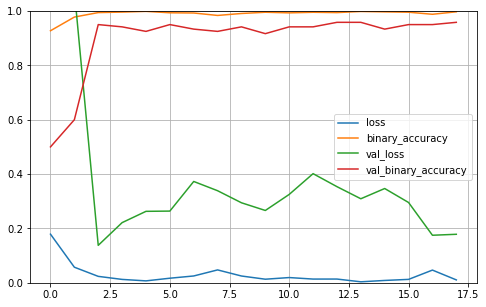

In [87]:
historyres = res.fit(train_generator,
                   steps_per_epoch=241,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[res_early_stop])

pd.DataFrame(historyres.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [88]:
evaluate(res)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


242/242 [==============================] - 44s 177ms/step - loss: 0.0087 - binary_accuracy: 0.9965
Test loss: 0.1408194899559021, Test acc: 0.9666666388511658 
Train loss: 0.008742774836719036, Train acc: 0.9965498447418213


In [89]:
res.save(r'D:\Diss\Weights\RES\Synthetic\res')

INFO:tensorflow:Assets written to: D:\Diss\Weights\RES\Synthetic\res\assets


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# INC

In [81]:
Inc = tf.keras.models.load_model(r'D:\Diss\Weights\INC\Synthetic\inc')

In [90]:
model = tf.keras.applications.InceptionV3(input_shape = (128,128,3),include_top=False,weights=None)
Inc = tf.keras.models.Sequential()
Inc.add(model)
Inc.add(layers.Flatten())
Inc.add(layers.Dense(512,activation="relu"))
Inc.add(layers.Dense(1,activation="sigmoid"))
Inc.summary()

Inc.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 25,998,113
Trainable params: 25,963,681
Non-trainable params: 34,432
_________________________________________________________________


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
241/241 [==============================] - 56s 227ms/step - loss: 0.2759 - binary_accuracy: 0.8873 - val_loss: 1.5496 - val_binary_accuracy: 0.5000
Epoch 2/30
241/241 [==============================] - 56s 231ms/step - loss: 0.1660 - binary_accuracy: 0.9354 - val_loss: 1.9280 - val_binary_accuracy: 0.5250
Epoch 3/30
241/241 [==============================] - 54s 223ms/step - loss: 0.1466 - binary_accuracy: 0.9464 - val_loss: 0.3262 - val_binary_accuracy: 0.8833
Epoch 4/30
241/241 [==============================] - 54s 222ms/step - loss: 0.1243 - binary_accuracy: 0.9550 - val_loss: 0.1941 - val_binary_accuracy: 0.9083
Epoch 5/30
241/241 [==============================] - 54s 222ms/step - loss: 0.1126 - binary_accuracy: 0.9583 - val_loss: 0.1732 - val_binary_accuracy: 0.8833
Epoch 6/30
241/241 [==============================] - 55s 227ms/step - loss: 0.0962 - binary_accuracy: 0.9649 - val_loss: 0.1303 - val_binary_accuracy: 0.9500
Epoch 7/30
241/241 [==========================

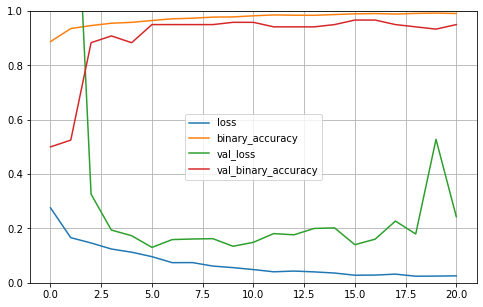

In [91]:
historyInc = Inc.fit(train_generator,
                   steps_per_epoch=241,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyInc.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [92]:
evaluate(Inc)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


242/242 [==============================] - 45s 181ms/step - loss: 0.0737 - binary_accuracy: 0.9723
Test loss: 0.20918746292591095, Test acc: 0.9200000166893005 
Train loss: 0.07367417961359024, Train acc: 0.9722605347633362


In [93]:
Inc.save(r'D:\Diss\Weights\INC\Synthetic\inc')

INFO:tensorflow:Assets written to: D:\Diss\Weights\INC\Synthetic\inc\assets


# CUSTOM

In [82]:
customS = tf.keras.models.load_model(r'D:\Diss\Weights\CUSTOM\Synthetic\custom')

In [32]:
customS = tf.keras.models.Sequential()
customS.add(layers.Conv2D(64, (5,5), padding="same", input_shape=[128,128,3]))
customS.add(layers.LeakyReLU(alpha=0.2))
customS.add(layers.Conv2D(128, (5,5), strides=(2,2), padding="same"))
customS.add(layers.LeakyReLU(alpha=0.2))
customS.add(layers.Conv2D(256, (5,5), strides=(2,2), padding="same"))
customS.add(layers.LeakyReLU(alpha=0.2))
customS.add(layers.Conv2D(512, (5,5), strides=(2,2), padding="same"))
customS.add(layers.LeakyReLU(alpha=0.2))
customS.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customS.add(layers.LeakyReLU(alpha=0.2))
customS.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customS.add(layers.LeakyReLU(alpha=0.2))
customS.add(layers.Flatten())
customS.add(layers.Dense(1,activation="sigmoid"))

In [33]:
customS.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 512)      

In [34]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

customS.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Epoch 1/50
241/241 [==============================] - 194s 793ms/step - loss: 0.1757 - binary_accuracy: 0.9250 - val_loss: 0.1065 - val_binary_accuracy: 0.9500
Epoch 2/50
241/241 [==============================] - 49s 201ms/step - loss: 0.0785 - binary_accuracy: 0.9734 - val_loss: 0.0887 - val_binary_accuracy: 0.9583
Epoch 3/50
241/241 [==============================] - 51s 210ms/step - loss: 0.0679 - binary_accuracy: 0.9749 - val_loss: 0.1256 - val_binary_accuracy: 0.9500
Epoch 4/50
241/241 [==============================] - 51s 212ms/step - loss: 0.0574 - binary_accuracy: 0.9796 - val_loss: 0.0796 - val_binary_accuracy: 0.9417
Epoch 5/50
241/241 [==============================] - 50s 206ms/step - loss: 0.0529 - binary_accuracy: 0.9813 - val_loss: 0.0764 - val_binary_accuracy: 0.9667
Epoch 6/50
241/241 [==============================] - 51s 209ms/step - loss: 0.0421 - binary_accuracy: 0.9852 - val_loss: 0.1287 - val_binary_accuracy: 0.9583
Epoch 7/50
241/241 [=========================

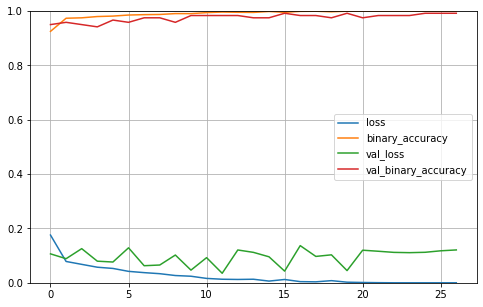

In [35]:
historyCustomS = customS.fit(train_generator,
                   steps_per_epoch=241,
                   epochs=50,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyCustomS.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [36]:
customS.save(r'D:\Diss\Weights\CUSTOM\Synthetic\custom')

INFO:tensorflow:Assets written to: D:\Diss\Weights\CUSTOM\Synthetic\custom\assets


In [37]:
evaluate(customS)

242/242 [==============================] - 40s 163ms/step - loss: 0.0129 - binary_accuracy: 0.9959
Test loss: 0.140274316072464, Test acc: 0.9549999833106995 
Train loss: 0.012928048148751259, Train acc: 0.9958598017692566


# Precision / Recall / F1

In [83]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [38]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                  shuffle=False,
                                                 class_mode="binary")

Found 300 images belonging to 2 classes.


In [41]:
y_true = test_generator.labels

In [86]:
vgg_pred = vgg.predict_generator(test_generator)
vgg_pred = np.round(vgg_pred).flatten()

res_pred = res.predict_generator(test_generator)
res_pred = np.round(res_pred).flatten()

Inc_pred = Inc.predict_generator(test_generator)
Inc_pred = np.round(Inc_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [42]:
customS_pred = customS.predict_generator(test_generator)
customS_pred = np.round(customS_pred).flatten()

In [89]:
print("Precision VGG: {}".format(precision_score(y_true, vgg_pred)))
print("Recall VGG: {}".format(recall_score(y_true, vgg_pred)))
print("F1 VGG: {}".format(f1_score(y_true, vgg_pred)))

Precision VGG: 0.9009009009009009
Recall VGG: 1.0
F1 VGG: 0.947867298578199


In [90]:
print("Precision RES: {}".format(precision_score(y_true, res_pred)))
print("Recall RES: {}".format(recall_score(y_true, res_pred)))
print("F1 RES: {}".format(f1_score(y_true, res_pred)))

Precision RES: 0.9252336448598131
Recall RES: 0.99
F1 RES: 0.9565217391304348


In [91]:
print("Precision INC: {}".format(precision_score(y_true, Inc_pred)))
print("Recall INC: {}".format(recall_score(y_true, Inc_pred)))
print("F1 INC: {}".format(f1_score(y_true, Inc_pred)))

Precision INC: 0.9587628865979382
Recall INC: 0.93
F1 INC: 0.9441624365482233


In [43]:
print("Precision CUSTOM: {}".format(precision_score(y_true, customS_pred)))
print("Recall CUSTOM: {}".format(recall_score(y_true, customS_pred)))
print("F1 CUSTOM: {}".format(f1_score(y_true, customS_pred)))

Precision CUSTOM: 0.97
Recall CUSTOM: 0.97
F1 CUSTOM: 0.97


## Pneumonia GAN

In [10]:
generatorP = generator()
generatorP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65536)             6553600   
_________________________________________________________________
batch_normalization (BatchNo (None, 65536)             262144    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 65536)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 1024)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 512)       13107200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 512)       2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 512)       0

In [11]:
discriminatorP = discriminator()
discriminatorP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 512)      

In [12]:
EPOCHS = 10
noise_dim = 100
num_examples = 16

seed = tf.random.normal([num_examples, noise_dim])

In [13]:
d_optimizer = keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
g_optimizer = keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)

loss = keras.losses.BinaryCrossentropy(from_logits=True)

In [14]:
def disc_loss(real, fake):
    real_loss = loss(tf.zeros_like(real), real)
    fake_loss = loss(tf.ones_like(fake), fake)
    total = real_loss + fake_loss
    return total

def gen_loss(fake):
    return loss(tf.zeros_like(fake),fake)

checkpoint_dir = './training_checkpoints_pneumonia'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=g_optimizer,
                                 discriminator_optimizer=d_optimizer,
                                 generator=generatorP,
                                 discriminator=discriminatorP)

In [15]:
train_dir = r'D:\Diss\Full\train'

train_pneu_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=50,
                                                   classes=["Pneumonia"])

Found 3623 images belonging to 1 classes.


In [16]:
@tf.function
def train_step(images):
    noise = tf.random.normal(shape=(50,100))
    
    with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
        
        fake_images = generatorP(noise, training=True)

        real_output = discriminatorP(images, training=True)
        fake_output = discriminatorP(fake_images, training=True)
        
        d_loss = disc_loss(real_output,fake_output)
        g_loss = gen_loss(fake_output)
        
    disc_grads = d_tape.gradient(d_loss, discriminatorP.trainable_weights)
    d_optimizer.apply_gradients(zip(disc_grads, discriminatorP.trainable_weights))
    

    gen_grads = g_tape.gradient(g_loss, generatorP.trainable_weights)  
    g_optimizer.apply_gradients(zip(gen_grads, generatorP.trainable_weights))
    
    
    return g_loss, d_loss

In [17]:
tf.config.run_functions_eagerly(True)
def train(data, epochs, batches=20):
    
    for epoch in range(epochs):
        start = time.time()
        
        for i in range(70):
            images = data.next()
            g_loss, d_loss = train_step(images[0])
            

        display.clear_output(wait=True)
        generate_save_images(generatorP,epoch+1,seed)
        
        print("D_loss {}".format(d_loss))
        print("G_loss {}".format(g_loss))
        
        #if (epoch + 1) % 15 == 0:
            #checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_save_images(generatorP,
                       epochs,
                       seed)

In [18]:
#checkpoint.restore(tf.train.latest_checkpoint(r'./training_checkpoints'))
#furthest trained
checkpoint.restore(r'./training_checkpoints_pneumonia\\ckpt-6')

# best so far
#checkpoint.restore(r'./training_checkpoints_pneumonia\\ckpt-6')

In [16]:
def generate_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    
    fig = plt.figure(figsize=(4,4))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(predictions[i,:,:,0]*127.5+127.5, cmap="gray")
        plt.axis("off")
        
    plt.savefig("image.png")
    plt.show()

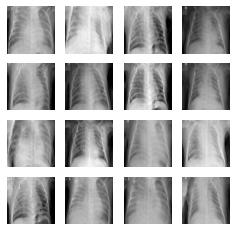

D_loss 0.09283319115638733
G_loss 8.563008308410645
Time for epoch 2 is 91.17603635787964 sec


KeyboardInterrupt: 

In [22]:
train(train_pneu_generator, EPOCHS)

In [29]:
checkpoint.save(file_prefix = checkpoint_prefix)

'./training_checkpoints_pneumonia\\ckpt-6'

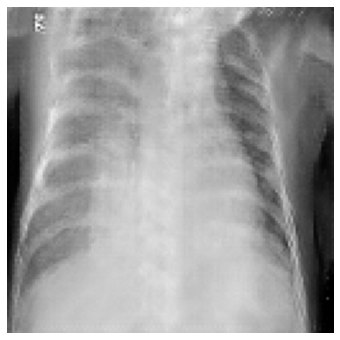

In [17]:
test = generatorP(tf.random.normal([num_examples, noise_dim]))
fig = plt.figure(figsize=(6,6))
plt.imshow(test[0,:,:,0]*127.5+127.5, cmap="gray")
plt.axis("off")
plt.show()

In [18]:
fid_pneu_generator1 = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=3623,
                                                   classes=["Pneumonia"])

t = fid_pneu_generator1.next()[0]

Found 3623 images belonging to 1 classes.


In [21]:
m = []
result = []
for i in range(689):
    noise = tf.random.normal(shape=(2,100))
    m.append(generatorP(noise, training=False))
flat_listp = [item for sublist in m for item in sublist]
flat_listp = np.asarray(flat_listp)

In [20]:
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

fid_pneu_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=100,
                                                   classes=["Pneumonia"])

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(128,128,3))
# load cifar10 images
#(images1, _) = fid_norm_generator.next()
#noise = tf.random.normal(shape=(100,100))
#(images2,_) = fid_norm_generator.next()
#images2 = generator(noise, training=False)
#shuffle(images1)
print('Loaded', t.shape, flat_list.shape)
# convert integer to floating point values
#images1 = images1.astype('float32')
#images2 = images2.astype('float32')

# calculate fid
fid = calculate_fid(model, t, flat_list)
print('FID: %.3f' % fid)

Found 3623 images belonging to 1 classes.
Loaded (3623, 128, 128, 3) (3622, 128, 128, 3)


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


FID: 1791.611


In [25]:
# Test against normal class (0=normal, 1=pneumonia)
def evaluateGAN(model):
    noise = tf.random.normal(shape=(71,100))
    loss, acc = model.evaluate(flat_listp,y=np.asarray([1.]*1378))
    
    print("loss: {0}, acc: {1}".format(loss,acc))

In [26]:
evaluateGAN(vgg)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


44/44 [==============================] - 3s 54ms/step - loss: 0.0074 - binary_accuracy: 0.9978
loss: 0.0073512885719537735, acc: 0.9978229403495789


In [19]:
m = []
result = []
for i in range(1906):
    noise = tf.random.normal(shape=(2,100))
    m.append(generator(noise, training=False))
flat_list = [item for sublist in m for item in sublist]
flat_list = np.asarray(flat_list)

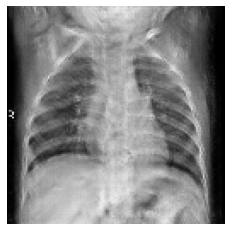

In [20]:
# Save images into folder
plt.imshow(flat_list[0,:,:,0]*127.5+127.5, cmap="gray")
plt.axis("off")
plt.show()
for i in range(len(flat_list)):
    plt.imsave(r'D:\Diss\Extended\train\Normal\synth{0}.jpeg'.format(i), flat_list[i,:,:,0]*127.5+127.5, cmap="gray")

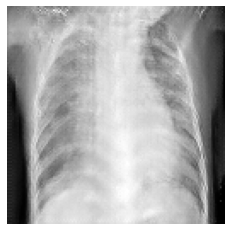

In [28]:
# Save images into folder
plt.imshow(flat_listp[0,:,:,0]*127.5+127.5, cmap="gray")
plt.axis("off")
plt.show()
for i in range(len(flat_listp)):
    plt.imsave(r'D:\Diss\Extended\train\Pneumonia\synth{0}.jpeg'.format(i), flat_listp[i,:,:,0]*127.5+127.5, cmap="gray")

# Extended

In [57]:
train_dir = r'D:\Diss\Extended\train'
test_dir = r'D:\Diss\Extended\test'
validation_dir = r'D:\Diss\Validation'

In [58]:
def prep_fn(img):
    img = img.astype(np.float32) / 127.5
    img = (img - 1)
    return img

train_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
test_datagen = ImageDataGenerator(preprocessing_function=prep_fn)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(128,128),
                                                   batch_size=30,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(128,128),
                                                       batch_size=12,
                                                       class_mode="binary")

Found 10000 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# VGG

In [95]:
vgg = tf.keras.models.load_model(r'D:\Diss\Weights\VGG\Extended\vgg')

In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

model = tf.keras.applications.VGG19(input_shape = (128,128,3),include_top=False,weights=None)
vgg = tf.keras.models.Sequential()
vgg.add(model)
vgg.add(layers.Flatten())
vgg.add(layers.Dense(512,activation="relu"))
vgg.add(layers.Dense(1,activation="sigmoid"))
vgg.summary()

vgg.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 24,219,713
Trainable params: 24,219,713
Non-trainable params: 0
_________________________________________________________________


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
333/333 [==============================] - 89s 257ms/step - loss: 0.2434 - binary_accuracy: 0.8880 - val_loss: 0.1359 - val_binary_accuracy: 0.9500
Epoch 2/30
333/333 [==============================] - 51s 153ms/step - loss: 0.0873 - binary_accuracy: 0.9687 - val_loss: 0.0913 - val_binary_accuracy: 0.9583
Epoch 3/30
333/333 [==============================] - 51s 154ms/step - loss: 0.0661 - binary_accuracy: 0.9773 - val_loss: 0.0793 - val_binary_accuracy: 0.9750
Epoch 4/30
333/333 [==============================] - 52s 155ms/step - loss: 0.0539 - binary_accuracy: 0.9807 - val_loss: 0.0635 - val_binary_accuracy: 0.9750
Epoch 5/30
333/333 [==============================] - 51s 153ms/step - loss: 0.0460 - binary_accuracy: 0.9836 - val_loss: 0.0886 - val_binary_accuracy: 0.9750
Epoch 6/30
333/333 [==============================] - 51s 153ms/step - loss: 0.0379 - binary_accuracy: 0.9876 - val_loss: 0.0722 - val_binary_accuracy: 0.9667
Epoch 7/30
333/333 [==========================

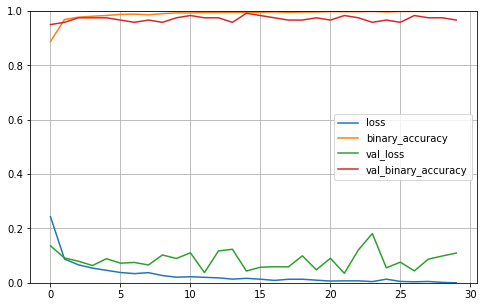

In [32]:
history = vgg.fit(train_generator,
                   steps_per_epoch=333,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                 class_mode="binary")

def evaluate(model):
    test_loss, test_acc = model.evaluate(test_generator)
    train_loss, train_acc = model.evaluate(train_generator)
    
    print("Test loss: {0}, Test acc: {1} \nTrain loss: {2}, Train acc: {3}".format(test_loss,test_acc,
                                                                                   train_loss, train_acc))

Found 300 images belonging to 2 classes.


In [34]:
evaluate(vgg)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


334/334 [==============================] - 42s 124ms/step - loss: 1.6392e-05 - binary_accuracy: 1.0000
Test loss: 0.0945298969745636, Test acc: 0.9733333587646484 
Train loss: 1.6392124962294474e-05, Train acc: 1.0


In [35]:
vgg.save(r'D:\Diss\Weights\VGG\Extended\vgg')

INFO:tensorflow:Assets written to: D:\Diss\Weights\VGG\Extended\vgg\assets


# INC

In [96]:
Inc = tf.keras.models.load_model(r'D:\Diss\Weights\INC\Extended\inc')

In [36]:
model = tf.keras.applications.InceptionV3(input_shape = (128,128,3),include_top=False,weights=None)
Inc = tf.keras.models.Sequential()
Inc.add(model)
Inc.add(layers.Flatten())
Inc.add(layers.Dense(512,activation="relu"))
Inc.add(layers.Dense(1,activation="sigmoid"))
Inc.summary()

Inc.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 25,998,113
Trainable params: 25,963,681
Non-trainable params: 34,432
_________________________________________________________________


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
333/333 [==============================] - 69s 202ms/step - loss: 0.2318 - binary_accuracy: 0.9093 - val_loss: 1.9965 - val_binary_accuracy: 0.5000
Epoch 2/30
333/333 [==============================] - 67s 202ms/step - loss: 0.1427 - binary_accuracy: 0.9509 - val_loss: 0.1964 - val_binary_accuracy: 0.9417
Epoch 3/30
333/333 [==============================] - 67s 201ms/step - loss: 0.1030 - binary_accuracy: 0.9632 - val_loss: 0.2211 - val_binary_accuracy: 0.9417
Epoch 4/30
333/333 [==============================] - 66s 198ms/step - loss: 0.0918 - binary_accuracy: 0.9657 - val_loss: 0.1294 - val_binary_accuracy: 0.9500
Epoch 5/30
333/333 [==============================] - 66s 198ms/step - loss: 0.0839 - binary_accuracy: 0.9715 - val_loss: 0.3326 - val_binary_accuracy: 0.8750
Epoch 6/30
333/333 [==============================] - 65s 196ms/step - loss: 0.0690 - binary_accuracy: 0.9752 - val_loss: 0.1108 - val_binary_accuracy: 0.9417
Epoch 7/30
333/333 [==========================

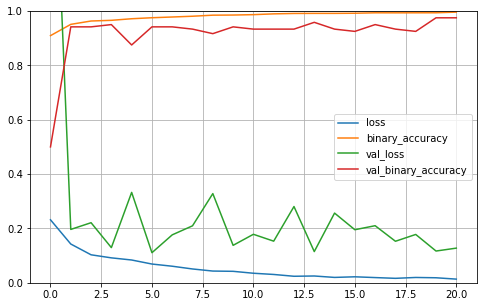

In [37]:
historyInc = Inc.fit(train_generator,
                   steps_per_epoch=333,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyInc.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [38]:
evaluate(Inc)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


334/334 [==============================] - 48s 140ms/step - loss: 0.0350 - binary_accuracy: 0.9888
Test loss: 0.15371213853359222, Test acc: 0.9333333373069763 
Train loss: 0.035042908042669296, Train acc: 0.9887999892234802


In [39]:
Inc.save(r'D:\Diss\Weights\INC\Extended\inc')

INFO:tensorflow:Assets written to: D:\Diss\Weights\INC\Extended\inc\assets


# RES

In [97]:
res = tf.keras.models.load_model(r'D:\Diss\Weights\RES\Extended\res')

In [40]:
res_early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=False)

In [41]:
model = tf.keras.applications.ResNet50V2(input_shape = (128,128,3),include_top=False,weights=None)
res = tf.keras.models.Sequential()
res.add(model)
res.add(layers.Flatten())
res.add(layers.Dense(512,activation="relu"))
res.add(layers.Dense(1,activation="sigmoid"))
res.summary()

res.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 4, 4, 2048)        23564800  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 40,343,041
Trainable params: 40,297,601
Non-trainable params: 45,440
_________________________________________________________________


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
333/333 [==============================] - 58s 171ms/step - loss: 0.1254 - binary_accuracy: 0.9510 - val_loss: 3.8988 - val_binary_accuracy: 0.5000
Epoch 2/30
333/333 [==============================] - 58s 174ms/step - loss: 0.0423 - binary_accuracy: 0.9831 - val_loss: 0.2394 - val_binary_accuracy: 0.9083
Epoch 3/30
333/333 [==============================] - 56s 167ms/step - loss: 0.0188 - binary_accuracy: 0.9932 - val_loss: 0.1907 - val_binary_accuracy: 0.9417
Epoch 4/30
333/333 [==============================] - 56s 168ms/step - loss: 0.0232 - binary_accuracy: 0.9910 - val_loss: 0.1908 - val_binary_accuracy: 0.9417
Epoch 5/30
333/333 [==============================] - 56s 168ms/step - loss: 0.0266 - binary_accuracy: 0.9912 - val_loss: 0.2034 - val_binary_accuracy: 0.9500
Epoch 6/30
333/333 [==============================] - 58s 173ms/step - loss: 0.0290 - binary_accuracy: 0.9899 - val_loss: 0.2163 - val_binary_accuracy: 0.9417
Epoch 7/30
333/333 [==========================

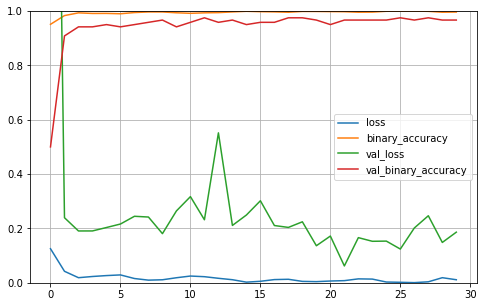

In [42]:
historyres = res.fit(train_generator,
                   steps_per_epoch=333,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[res_early_stop])

pd.DataFrame(historyres.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
evaluate(res)

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


334/334 [==============================] - 48s 142ms/step - loss: 0.0013 - binary_accuracy: 0.9997
Test loss: 0.20464511215686798, Test acc: 0.9666666388511658 
Train loss: 0.001260878168977797, Train acc: 0.9997000098228455


In [44]:
res.save(r'D:\Diss\Weights\RES\Extended\res')

INFO:tensorflow:Assets written to: D:\Diss\Weights\RES\Extended\res\assets


C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# CUSTOM

In [98]:
customE = tf.keras.models.load_model(r'D:\Diss\Weights\CUSTOM\Extended\custom')

In [46]:
customE = tf.keras.models.Sequential()
customE.add(layers.Conv2D(64, (5,5), padding="same", input_shape=[128,128,3]))
customE.add(layers.LeakyReLU(alpha=0.2))
customE.add(layers.Conv2D(128, (5,5), strides=(2,2), padding="same"))
customE.add(layers.LeakyReLU(alpha=0.2))
customE.add(layers.Conv2D(256, (5,5), strides=(2,2), padding="same"))
customE.add(layers.LeakyReLU(alpha=0.2))
customE.add(layers.Conv2D(512, (5,5), strides=(2,2), padding="same"))
customE.add(layers.LeakyReLU(alpha=0.2))
customE.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customE.add(layers.LeakyReLU(alpha=0.2))
customE.add(layers.Conv2D(1024, (5,5), strides=(2,2), padding="same"))
customE.add(layers.LeakyReLU(alpha=0.2))
customE.add(layers.Flatten())
customE.add(layers.Dense(1,activation="sigmoid"))

In [47]:
customE.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 512)      

In [48]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

customE.compile(loss="binary_crossentropy",
             optimizer=optimizers.Adam(learning_rate=2e-5),
             metrics=keras.metrics.BinaryAccuracy())

Epoch 1/50
333/333 [==============================] - 220s 659ms/step - loss: 0.1218 - binary_accuracy: 0.9531 - val_loss: 0.1344 - val_binary_accuracy: 0.9250
Epoch 2/50
333/333 [==============================] - 67s 200ms/step - loss: 0.0586 - binary_accuracy: 0.9784 - val_loss: 0.0919 - val_binary_accuracy: 0.9583- 
Epoch 3/50
333/333 [==============================] - 70s 208ms/step - loss: 0.0512 - binary_accuracy: 0.9811 - val_loss: 0.0810 - val_binary_accuracy: 0.9667
Epoch 4/50
333/333 [==============================] - 71s 212ms/step - loss: 0.0382 - binary_accuracy: 0.9862 - val_loss: 0.0856 - val_binary_accuracy: 0.9667
Epoch 5/50
333/333 [==============================] - 72s 215ms/step - loss: 0.0380 - binary_accuracy: 0.9868 - val_loss: 0.0606 - val_binary_accuracy: 0.9833
Epoch 6/50
333/333 [==============================] - 71s 213ms/step - loss: 0.0275 - binary_accuracy: 0.9895 - val_loss: 0.0566 - val_binary_accuracy: 0.9750
Epoch 7/50
333/333 [=======================

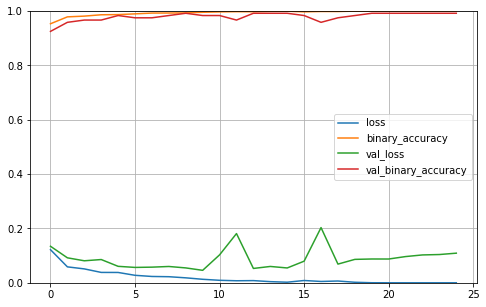

In [49]:
historyCustomE = customE.fit(train_generator,
                   steps_per_epoch=333,
                   epochs=50,
                   validation_data=validation_generator,
                   validation_steps=10,
                    callbacks=[early_stop])

pd.DataFrame(historyCustomE.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [50]:
customE.save(r'D:\Diss\Weights\CUSTOM\Extended\custom')

INFO:tensorflow:Assets written to: D:\Diss\Weights\CUSTOM\Extended\custom\assets


In [51]:
evaluate(customE)

334/334 [==============================] - 42s 124ms/step - loss: 0.0056 - binary_accuracy: 0.9986
Test loss: 0.08938732743263245, Test acc: 0.9700000286102295 
Train loss: 0.0055602011270821095, Train acc: 0.9986000061035156


# Precision / Recall / F1

In [99]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [59]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                 target_size=(128,128),
                                                  shuffle=False,
                                                 class_mode="binary")

Found 300 images belonging to 2 classes.


In [60]:
y_true = test_generator.labels

In [101]:
vgg_pred = vgg.predict_generator(test_generator)
vgg_pred = np.round(vgg_pred).flatten()

res_pred = res.predict_generator(test_generator)
res_pred = np.round(res_pred).flatten()

Inc_pred = Inc.predict_generator(test_generator)
Inc_pred = np.round(Inc_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [61]:
customE_pred = customE.predict_generator(test_generator)
customE_pred = np.round(customE_pred).flatten()

C:\Users\Pete\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [105]:
print("Precision VGG: {}".format(precision_score(y_true, vgg_pred)))
print("Recall VGG: {}".format(recall_score(y_true, vgg_pred)))
print("F1 VGG: {}".format(f1_score(y_true, vgg_pred)))

Precision VGG: 0.98
Recall VGG: 0.98
F1 VGG: 0.98


In [106]:
print("Precision RES: {}".format(precision_score(y_true, res_pred)))
print("Recall RES: {}".format(recall_score(y_true, res_pred)))
print("F1 RES: {}".format(f1_score(y_true, res_pred)))

Precision RES: 0.9611650485436893
Recall RES: 0.99
F1 RES: 0.9753694581280788


In [107]:
print("Precision INC: {}".format(precision_score(y_true, Inc_pred)))
print("Recall INC: {}".format(recall_score(y_true, Inc_pred)))
print("F1 INC: {}".format(f1_score(y_true, Inc_pred)))

Precision INC: 0.9368932038834952
Recall INC: 0.965
F1 INC: 0.9507389162561576


In [62]:
print("Precision CUSTOM: {}".format(precision_score(y_true, customE_pred)))
print("Recall CUSTOM: {}".format(recall_score(y_true, customE_pred)))
print("F1 CUSTOM: {}".format(f1_score(y_true, customE_pred)))

Precision CUSTOM: 0.9704433497536946
Recall CUSTOM: 0.985
F1 CUSTOM: 0.977667493796526
